### Importing the Libraries

In [843]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

### Reading the Dataset

In [844]:
directory = "./Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name,0)
        dataset.append([image, label])

random.shuffle(dataset)

### Creating x & y

In [845]:
x = []
y = []

for image, label in dataset:
    x.append(image)
    y.append(label)

x = np.array(x)
y = np.array(y)

### Function for Generating Label

In [846]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

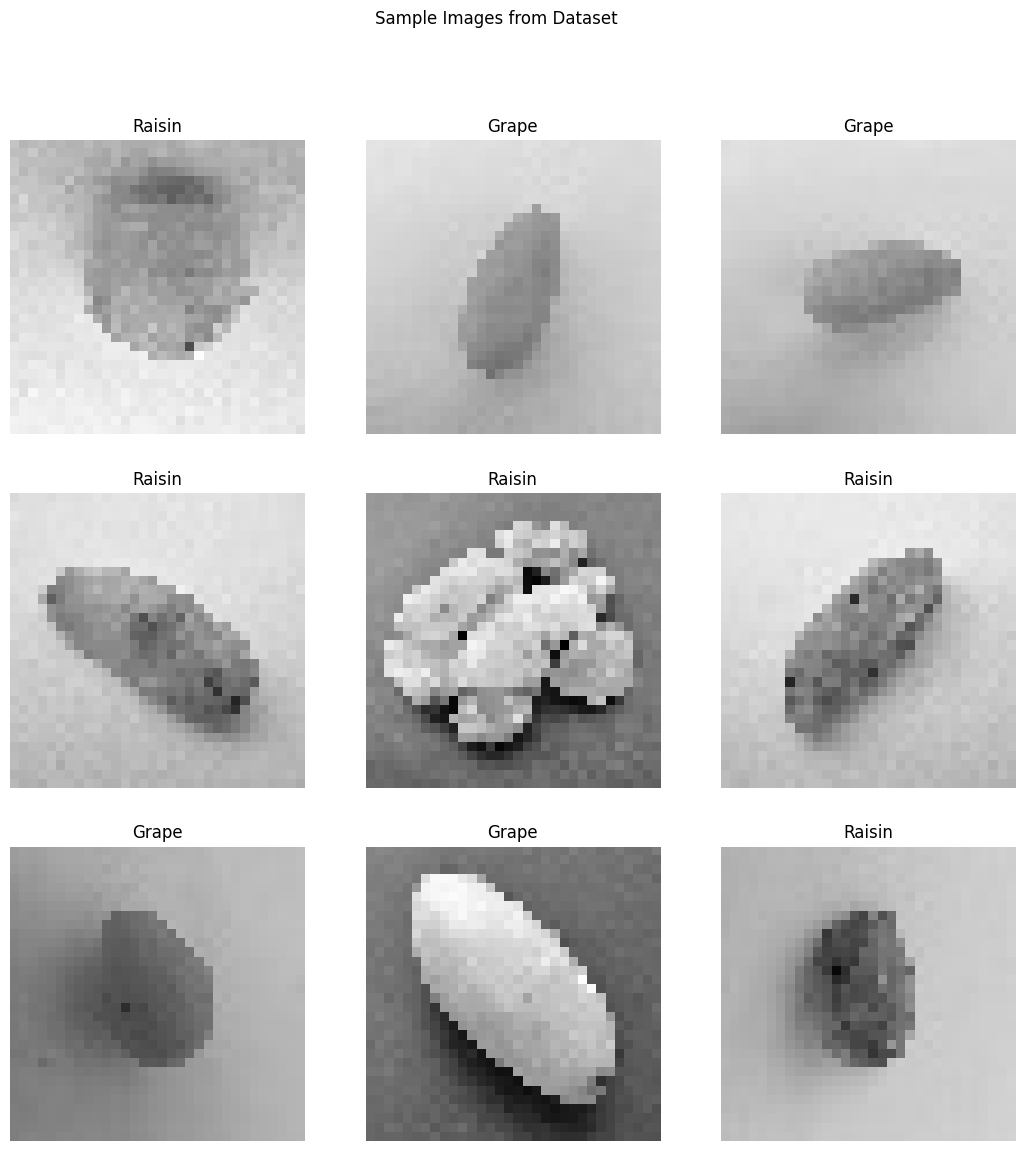

In [847]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Splitting the Dataset into Training & Test Set

In [848]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12)

print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (544, 32, 32) (544,)
Validation set: (136, 32, 32) (136,)
Test set: (170, 32, 32) (170,)


### Building the Model

In [849]:
inputs = Input(shape = (32, 32, 1))
x = Flatten()(inputs)

x = Dense(128, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(512, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)


outputs = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = Adam(0.00015), loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "functional_171"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_85 (InputLayer)     │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_81 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_506 (Dense)               │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_507 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_508 (Dense)               │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_509 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_510 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_511 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 460,161 (1.76 MB)

 Trainable params: 460,161 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [850]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4973 - loss: 9.8597 - val_accuracy: 0.6324 - val_loss: 1.2939
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5693 - loss: 2.0096 - val_accuracy: 0.6838 - val_loss: 1.4101
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.7858 - val_accuracy: 0.6985 - val_loss: 0.9729
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7760 - loss: 0.5082 - val_accuracy: 0.7059 - val_loss: 0.8766
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8022 - loss: 0.4292 - val_accuracy: 0.7206 - val_loss: 1.1906
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7876 - loss: 0.5656 - val_accuracy: 0.7279 - val_loss: 0.8157
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8886 - loss: 0.2836 - val_accuracy: 0.6985 - val_loss: 1.1757
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7909 - loss: 0.5733 - val_accuracy: 0.7500 - val_loss

### Plotting The Accuracy & Loss Graph

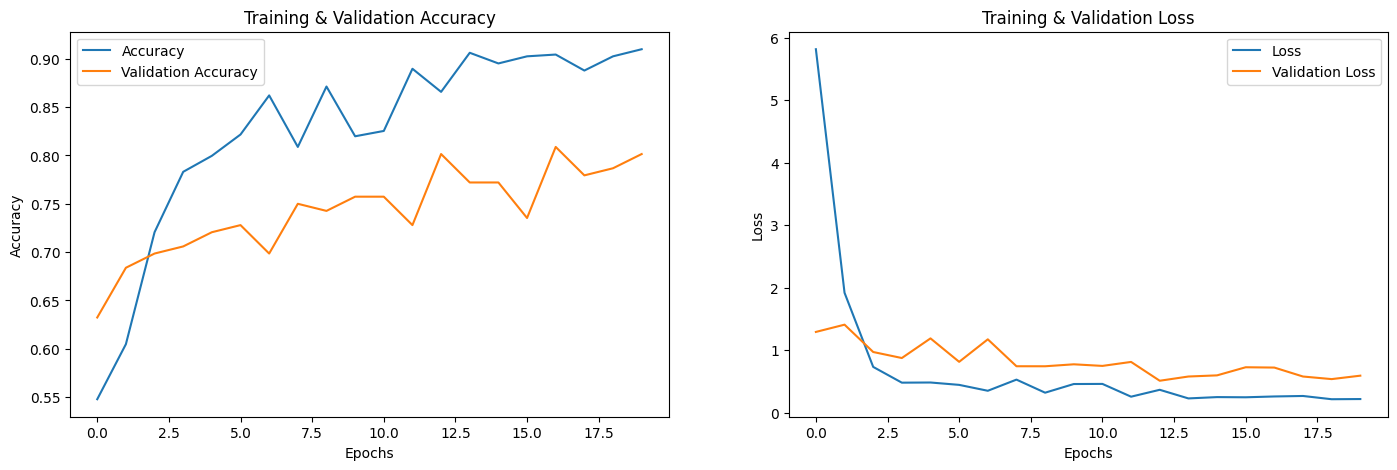

In [851]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [852]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")
print(f"Test Loss: {round(test_loss * 100, 2)}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8217 - loss: 0.4031 
Test Accuracy: 85.29%
Test Loss: 37.49%
